<a href="https://colab.research.google.com/github/julianfrodriguezh-web/Regresion_Lineal/blob/main/Regresion_Lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Taller 3: Regresión Lineal y Conceptos Fundamentales***

## **Parte 1: Definición del Problema**
Piensa en tu experiencia académica o laboral en un área de operaciones y elige un problema relacionado con inventarios, calidad, mantenimiento o productividad.

1.   Indica cuál es tu variable dependiente Y. (aquello que quieres predecir o clasificar).
2.   Lista entre 3 y 5 variables independientes
 que medirías para predecir
3.   Especifica si tu problema es de regresión.  


***PROBLEMA: Inventarios - (Calzado)***

En la actualidad, la tienda de calzado gestiona sus inventarios de manera manual, lo cual genera errores frecuentes, pérdidas de tiempo y dificultades en la atención al cliente por falta de información actualizada sobre disponibilidad de productos. Esto afecta tanto la eficiencia operativa como la experiencia del consumidor, lo que genera un desafío para la sostenibilidad y competitividad del negocio. La introducción de un sistema digital de control de inventarios busca resolver estas limitaciones, garantizando mayor exactitud y agilidad en las operaciones diarias.

**Respuesta 1:**

Variable dependiente (Y):
*   Método de gestión de inventario (manual vs. digital).

***Respuesta 2:***

Variable independiente (X):

*   Precisión del registro de existencias.
*   Tiempo de atención al cliente.
*   Nivel de satisfacción de los empleados.

***Respuesta 3:***

Tipo de problema:
Regresión lineal, ya que se busca predecir un valor númerico. (Cantidad de unidades vendidas


**Parte 2: Preprocesamiento de Datos y *Leakage*** *texto en cursiva*
 Basado en el caso que definiste en la Parte 1:

 Lista entre 3 y 5 transformaciones que aplicarías a tus datos (ej. imputación de valores faltantes, codificación de variables categóricas, escalado, creación de lags, etc.) y justifica por qué cada una es necesaria.


  1.   Imputación:

    1.1 Registro faltante de número de clientes
    1.2 Registro faltante de inventario disponible
    1.3 Registro faltante en la base de datos del precio del producto.

  2.   Categoricas

    2.1 Número de clientes (calsificación baja, media o alta influencia)
    2.2 Stock de inventario (calsificación baja, media o alto)
    
  3.   Lags ( Nueva variable que guarde el valor en periodos antesriores)

    3.1 Lag-1 :Valor de la semana pasada del producto o descuento
    3.2 Lag-2: Valor meses anteriores

 Señala un posible riesgo de data leakage (fuga de datos) en tu plan y explica cómo lo evitarías usando un pipeline de preprocesamiento.

Respuesta:
Un riesgo de fuga surge si se usa el inventario final del día para predecir la demanda, ya que ese dato solo se conoce después de la jornada.
Esto genera sesgos al incorporar información futura no disponible en el momento de la predicción.
La estimación debe basarse en datos accesibles como inventario inicial, ventas históricas o promociones.

***Pipeline de procesamiento***

1. Imputación de valores faltantes:

*   Si falta el precio de un producto,lo relleno con la media de los precios en el entrenamiento
*   Si falta la disponibilidad de inventario, lo completo con la categoría más común


2. Codificación de la variable categórica (inventario: Bajo, Medio, Alto):

*   Transformo esas categorías en
variables dummy (0 y 1), pero solo usando los datos de entrenamiento.

3. Escalado de las variables numéricas (precio, número de clientes)

*   Normalizo para que estén en la misma escala, pero calculando la media y desviación solo con el entrenamiento.

4. Creación de lags:

*   Uso el inventario inicial o la demanda del día anterior como variable, en lugar de usar el inventario final.



***Parte 3: Interpretación y Métricas de Regresión Simple***

Variable dependiente (Y)

*   Método de gestión de inventario (manual vs. digital).
    El control se hace a través de registros en papel, hojas de cálculo o conteos físicos    

Variable independiente (X)
*   Precisión del registro de existencias.
    Costo de venta del producto (Pesos/Unidad)
*   Tiempo de atención al cliente.
    Tiempo que se tarda en ser atendido un cliente
*   Nivel de satisfacción de los empleados.
    Medicion de que tan satisfechos se encuentran los empleados

¿Qué métrica de evaluación usarías (MAE, RMSE, o MAPE) y por qué es la más adecuada para tu caso?
Usaría MAPE (Mean Absolute Percentage Error)

Menciona un supuesto del modelo de regresión lineal que validarías (ej. linealidad, homocedasticidad) y explica cómo lo harías (usando un gráfico o una prueba estadística).
Respuesta (escribe aquí):
Expresa el error en porcentaje, lo que facilita interpretar qué tan lejos estuvo la predicción de la demanda real.

Es útil en un contexto comercial, ya que permite responder preguntas como: “¿Qué tanto se desvió mi pronóstico de la venta real de zapatos?”.

Al comparar distintos productos (zapatillas, botas, sandalias), el MAPE es más intuitivo, pues normaliza el error respecto al valor real.

***Parte 4: Regresión Múltiple y Colinealidad***
Volviendo a tu caso de la Parte 1 (con múltiples variables).

Escribe el vector de variables
 y la respuesta.
 Vector de variables (X):

Precio del producto

Numero de clientes

Inventario disponible

Promociones o descuentos

Dia de la semana

Tipo de producto

Respuesta (Y):

Unidades vendidas del producto por semana
Explica cómo interpretarías el coeficiente de una de tus variables clave (incluyendo unidades y el sentido de la relación: positiva o negativa).
Si sospecharas que existe colinealidad entre tus variables, menciona dos acciones que podrías tomar para mitigarla.
Respuesta (escribe aquí):

Interpretacion del coeficiente:

Supongamos que el coeficiente de la variable Precio es -2.5.

Esto significa que por cada aumento de 1 peso en el precio del producto, la demanda semanal (unidades vendidas) disminuye en 2.5 unidades, manteniendo constantes las demas variables (clientes, inventario, promociones, etc.).

Unidades: unidades/semana por peso.

Sentido de la relacion: Negativo, porque un aumento en el precio reduce las ventas (relacion inversa).

Eliminar o combinar variables altamente correlacionadas

Si dos variables aportan informacion muy similar (por ejemplo, precio del producto y porcentaje de descuento), puedes conservar solo una o combinarlas en una nueva variable (por ejemplo, precio efectivo = precio – descuento).

Usar tecnicas de regularizacion (Ridge o Lasso)

Estos metodos reducen la varianza de los coeficientes y ayudan a estabilizar el modelo cuando existe colinealidad entre las variables independientes.


***Parte 5: Interacciones y Multicolinealidad (VIF)***
Plantea un caso con una variable
 y entre 4 y 6 variables
. ¿Qué término de interacción entre dos variables podrías añadir al modelo y por qué crees que sería útil?
Variable dependiente (Y):

Unidades vendidas de calzado por semana

Variables independientes (X):

Precio del producto

Numero de clientes que visitan la tienda

Inventario disponible

Promocion aplicada (%)

Tipo de calzado (deportivo, elegante, colegial)

Dia de la semana

Termino de interaccion propuesto:

Precio × Promocion

Si al calcular el Factor de Inflación de la Varianza (VIF) para una variable, obtienes un valor alto (ej. > 10), menciona dos acciones que podrías tomar para solucionarlo.

Eliminar o combinar variables colineales

Si una variable esta muy correlacionada con otra, se puede quitar del modelo o combinar ambas en una sola (por ejemplo, usar precio efectivo en lugar de precio y descuento por separado).

Aplicar tecnicas de regularizacion (Ridge o Lasso)

Estos metodos penalizan los coeficientes grandes y ayudan a reducir la inestabilidad causada por la colinealidad, manteniendo las variables en el modelo pero controlando su efecto.
Respuesta (escribe aquí):

***Parte 6: Variables Categóricas e Interacciones***

Variable categórica:

    DISPONIBILIDAD DEL INVENTARIO:
    * Inventario alto (> 100 und)
    * Inventario medio ( >= 30-100    und)
    * Inventario bajo (< 30 und)
    DIA DE LA SEMANA
    * Lunes - Martes- Miercoles, ...
    TIPO DE PRODUCTO
    * Perecedero, no perecedero.


Variable categorica :  
  Disponibilidad de inventario
  Categoria posible (Alto, medio, bajo)

    INTERACCIÓN

     * Dependiente Y: Demanda unidades vendidas
     * Dependiente X: Precio del producto ($)
     * Categoria: Disponibilidad de inventario

    Y = β0+β1(X1) + β2(Med) + β3(Alt) + β4(X1*Med) + β5(X1*Alt)





***Parte 7: Conceptos Clave de Clasificación***
Aunque el taller se centra en regresión, estos conceptos son fundamentales en Machine Learning.

1.   *Curva ROC:* Representación grafica que se utiliza para evaluar el rendimiento de un modelo de clasificación binaria.

    Ej. Pieza (Defectuoso, no defectuoso) (Fraude, no fraude).

2.   *Accuracy (exactitud):* Es el porcentaje de veces que el modelo acierta.

    Ej.  De todos los intentos,¿en cuántos acerte?
    Una bodega hay 1.0000 productos, de ls cuales 10 son defectuosos o en mal estado.
    *El modelo predice que todos son buenos, acierta en 990 casos,, su accuracy es 99%, ya que no encontro productos defectusos.

3.  *Matriz de confusión:* Es una tabla de resultados que nos dice en que se equivocó y en que acerto el modelo.

    Ej. Elodelo revisa 100 productos, y debe secir si son defectuosos o no defectuosos.
    * Realidad: (20 defectuosos - 80 buenos)
    * Modelo:
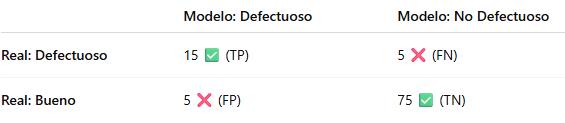

 Interpretación:

 Detecta bien 15 defectuosos, se le escapan 1 defectuosos; marca 5 buenos como defectuosos, y clasifica bien 75 buenos.
